# Loading the data

In [2]:
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
import sklearn

data_dir='./dataset/'

In [3]:
df = pd.read_csv(data_dir+'df_processed.csv')
df.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,label_sum,comment_lower,has_apostrophe,has_new_line,com_processed
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...,1,1,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,d'aww! he matches this background colour i'm s...,1,0,aww matches background colour seemingly stuck ...


In [4]:
target_columns = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def prepare_TFIDF(df, col):
    df_train, df_test = train_test_split(df, test_size=0.2, random_state = 8848)
    
    vectorizer = TfidfVectorizer(use_idf=True, max_df=0.95)
    vectorizer.fit_transform(df_train[col].values)
    
    X_train = vectorizer.transform(df_train[col].values)
    X_test  = vectorizer.transform(df_test[col].values)
    
    y_train = df_train[target_columns].values
    y_test  = df_test[target_columns].values

    return X_train, X_test, y_train, y_test, vectorizer

X_train_tf, X_test_tf, y_train_tf, y_test_tf, vectorizer= prepare_TFIDF(df, "com_processed")

In [8]:
print("X_train Shape: ", X_train_tf.toarray().shape)
print("y_train Shape: ", y_train_tf.shape)

X_train Shape:  (127608, 147278)
y_train Shape:  (127608, 6)


In [9]:
y_train_tf[:,0].shape

(127608,)

## Linear Discriminant Analysis  (LDA)

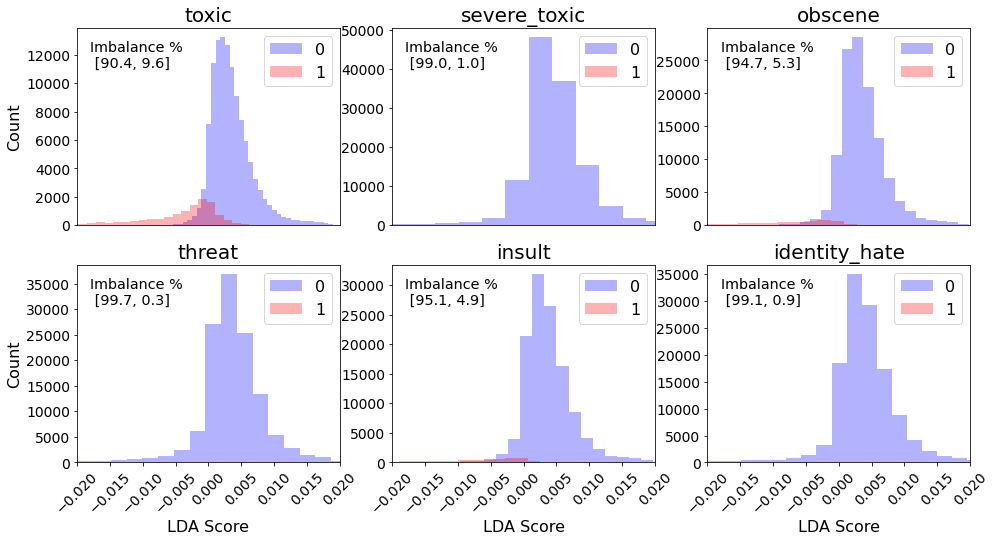

In [35]:
def LDA_plot(blue=False):
    plt.figure(1, figsize=(16,8))

    for n in range(6):
        # find the centroids for each classes
        X_0 = X_train_tf[y_train_tf[:,n]==0, :]
        X_1 = X_train_tf[y_train_tf[:,n]==1, :]
        x0_len=X_0.shape[0]
        x1_len=X_1.shape[0]
        ratio = np.round(100*x0_len/(x0_len+x1_len), 1)
        ratio_ = np.round(100-ratio, 1)

        ratio_text = "Imbalance %\n ["+str(ratio)+", "+str(ratio_)+"]"

        cent_0 = np.mean(X_0, axis=0)
        cent_1 = np.mean(X_1, axis=0)

        ## Now compute weight matrix
        w = cent_0 - cent_1
        train_lda_scores = X_train_tf.dot(w.T)  # had to transpose w to match the dimension
        lda_score_0 = train_lda_scores[y_train_tf[:,n]==0]
        lda_score_1 = train_lda_scores[y_train_tf[:,n]==1]

        plt.subplot(2,3,1+n)

        plt.hist(lda_score_0, color = "blue", label="0", bins=50, alpha=0.3)
        plt.hist(lda_score_1, color = "red",  label="1", bins=50, alpha=0.3)

        plt.title(target_columns[n], fontsize=20)
        if n%3==0:
            plt.ylabel("Count", fontsize=16)
        if n//3>=1:
            plt.xlabel("LDA Score", fontsize=16)
        else:
            plt.xticks([])
        plt.xlim([-0.02, 0.02])
        plt.xticks(fontsize=14, rotation=45)
        plt.yticks(fontsize=14)
        
        ymax=plt.ylim()[1]
        plt.text(-0.018, .8*ymax, ratio_text, fontsize='x-large')

        plt.legend(fontsize=16, loc='upper right')
    plt.subplots_adjust(hspace=0.2)
    plt.show()
    
LDA_plot(blue=False)